In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data augmentation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [4]:
root_dir = '../input/dataset-3-midas/mnistTask'
total_images = 0
for folder in sorted(os.listdir(root_dir)):    
    print(len(os.listdir(root_dir+'/'+folder)))
    total_images+=len(os.listdir(root_dir+'/'+folder))
    
print(total_images)

5980
5807
6009
6037
5914
6139
6037
5954
6129
5994
60000


(28, 28)


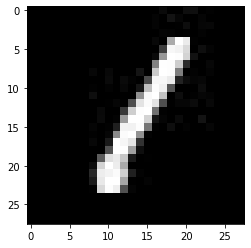

In [5]:
import matplotlib.pyplot as plt
img = plt.imread('../input/dataset-3-midas/mnistTask/0/image_000059.jpg')
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()

In [6]:
X = [] #list for storing image arrays
y = [] # list for storing the image labels

In [7]:
# storing digits from 0 to 9 first
label = 0 # count will be used to store the respective label
for i in sorted(os.listdir(root_dir)): 
    for j in os.listdir(root_dir + "/" + i): # accessing the folder
        X.append(cv2.imread(root_dir+"/" + i + "/" + j)) # accessing images in the respective folder
        y.append(label)

    label+=1 #incrementing the count/label 
    if(label==10): break # if all the images from 0 to 9 have been stored then break out of the loop

In [8]:
print(len(X))
print(len(y))

60000
60000


In [9]:
from PIL import Image

def pad_black(img):
    img = Image.fromarray(img)
    width, height = img.size

    right = 6
    left = 6
    top = 6
    bottom = 6

    new_width = width + right + left
    new_height = height + top + bottom

    result = Image.new(img.mode, (new_width, new_height), (0, 0, 0))

    result.paste(img, (left, top))
    

    new_np = np.array(result)    
    return new_np

(28, 28, 3)
(40, 40, 3)


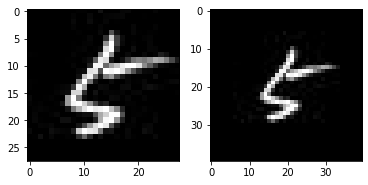

In [10]:
plt.subplot(1,2,1)
plt.imshow(X[0])
print(X[0].shape)

plt.subplot(1,2,2)
plt.imshow(pad_black(X[0]))
print(pad_black(X[0]).shape)

plt.show()

In [11]:
# padding images
for i in range(len(X)):
    X[i]= pad_black(X[i])

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
print(X.shape)
print(y.shape)

(60000, 40, 40, 3)
(60000,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 10000)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 40, 40, 3)
(10000, 40, 40, 3)
(50000,)
(10000,)


In [15]:
# Normalizing the input
X_train= X_train.reshape(X_train.shape[0], 40, 40, 3)
X_train = X_train.astype('float32')
X_train/=255
X_test = X_test.reshape(X_test.shape[0],40,40,3)
X_test = X_test.astype('float32')
X_test/=255
print(X_train.shape)
print(X_test.shape)

from  keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

(50000, 40, 40, 3)
(10000, 40, 40, 3)


In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 40, 40, 3)
(50000, 10)
(10000, 40, 40, 3)
(10000, 10)


In [50]:
from tensorflow.keras.models import load_model
part2_model = load_model('../input/part2-model/part2_model')
part2_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 36, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         1

In [52]:
model = part2_model

In [55]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#checkpoint
checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
                                            filepath=checkpoint_filepath,
                                            save_weights_only=False,
                                            monitor='accuracy',
                                            mode='max',
                                            save_best_only=True
                                            )

hist = model.fit(X_train, y_train,batch_size=32, epochs=10, callbacks=[reduce_lr],validation_data = (X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.9046 - accuracy: 0.0891 - val_loss: 2.2527 - val_accuracy: 0.1138
Epoch 2/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.2429 - accuracy: 0.1163 - val_loss: 2.2272 - val_accuracy: 0.1096
Epoch 3/10
1563/1563 [==============================] - 101s 64ms/step - loss: 2.2252 - accuracy: 0.1114 - val_loss: 2.2211 - val_accuracy: 0.1116
Epoch 4/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.2231 - accuracy: 0.1120 - val_loss: 2.2236 - val_accuracy: 0.1104
Epoch 5/10
1563/1563 [==============================] - 99s 63ms/step - loss: 2.2224 - accuracy: 0.1153 - val_loss: 2.2243 - val_accuracy: 0.1078
Epoch 6/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.2137 - accuracy: 0.1159 - val_loss: 2.2173 - val_accuracy: 0.1062
Epoch 7/10
1563/1563 [==============================] - 98s 63ms/step - loss: 2.2100 - accuracy: 0.1203 - val_loss: 2.2

In [17]:
random_model = Sequential()

random_model.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = 1, activation = 'relu', input_shape = (40, 40, 3)))
random_model.add(MaxPool2D(pool_size = (3, 3)))
random_model.add(Dropout(0.2))


random_model.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, activation = 'relu'))
random_model.add(MaxPool2D(pool_size = (2, 2)))
random_model.add(Dropout(0.2))


random_model.add(Conv2D(filters = 256, kernel_size = (2, 2), strides = 1, activation = 'relu'))
random_model.add(MaxPool2D(pool_size = (2, 2)))
random_model.add(Dropout(0.2))

random_model.add(Flatten())
random_model.add(Dense(512, activation='relu'))
random_model.add(Dense(256, activation='relu'))
random_model.add(Dense(10, activation = 'softmax')) 

random_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 36, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         1

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

random_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#checkpoint
random_checkpoint_filepath = '/checkpoint'
random_model_checkpoint_callback = ModelCheckpoint(
                                            filepath=random_checkpoint_filepath,
                                            save_weights_only=False,
                                            monitor='accuracy',
                                            mode='max',
                                            save_best_only=True
                                            )

random_hist = random_model.fit(X_train, y_train,batch_size=32, epochs=10, callbacks=[reduce_lr],validation_data = (X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 102s 65ms/step - loss: 2.3045 - accuracy: 0.1020 - val_loss: 2.3030 - val_accuracy: 0.1026
Epoch 2/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.3031 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.0998
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3030 - val_accuracy: 0.0998
Epoch 4/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.3026 - accuracy: 0.1042 - val_loss: 2.3027 - val_accuracy: 0.1026
Epoch 5/10
1563/1563 [==============================] - 99s 64ms/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.0998
Epoch 6/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.3026 - accuracy: 0.1034 - val_loss: 2.3028 - val_accuracy: 0.0998
Epoch 7/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.3024 - accuracy: 0.1048 - val_loss: 2.